In [1]:
import pandas as pd
import numpy as np

In [2]:
byte_sequence = b'\x80\x81...'
decoded_string = byte_sequence.decode('utf-8', errors='ignore')

In [3]:
df=pd.read_csv("C:/Users/ihsan/Downloads/spam.csv",encoding=('ISO-8859-1'))

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


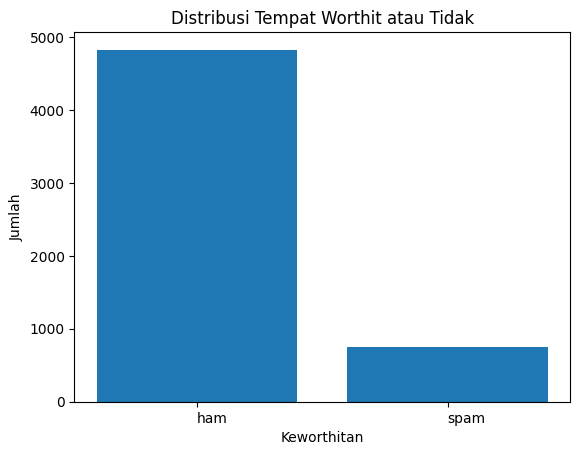

In [6]:
import matplotlib.pyplot as plt
category_counts = df['v1'].value_counts()


categories = category_counts.index.tolist()
count = category_counts.values.tolist()


plt.bar(categories, count,)


plt.xticks(rotation=0, ha='left')
plt.xlabel('Keworthitan')
plt.ylabel('Jumlah')


plt.title('Distribusi Tempat Worthit atau Tidak')


plt.show()


# Data Cleaning

# Menghapus Tanda Baca

In [7]:
import re
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text



In [8]:
df['v2'] = df['v2'].astype(str)

In [9]:
df['v2'] = df['v2'].apply(remove_special_characters)

In [10]:
print(df['v2'])

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will  b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: v2, Length: 5572, dtype: object


# Lowercase

In [11]:
df['v2'] = df['v2'].str.lower()


print(df['v2'])

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will  b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object


In [12]:
def remove_extra_whitespace(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text
df['v2'] = df['v2'].apply(remove_extra_whitespace)
print(df['v2'])

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                    will b going to esplanade fr home
5569    pity was in mood for that soany other suggestions
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ihsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize
df['v2'] = df['v2'].apply(word_tokenize)
print(df['v2'])

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: v2, Length: 5572, dtype: object


In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['v2'] = df['v2'].astype(str)
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [17]:
df['v2'] = df['v2'].apply(remove_stopwords)
print(df['v2'])

0       [ 'go ' , 'until ' , 'jurong ' , 'point ' , 'c...
1       [ 'ok ' , 'lar ' , 'joking ' , 'wif ' , ' u ' ...
2       [ 'free ' , 'entry ' , 'in ' , ' 2 ' , ' ' , '...
3       [ ' u ' , 'dun ' , 'say ' , 'so ' , 'early ' ,...
4       [ 'nah ' , ' ' , 'dont ' , 'think ' , 'he ' , ...
                              ...                        
5567    [ 'this ' , 'is ' , 'the ' , '2nd ' , 'time ' ...
5568    [ 'will ' , ' b ' , 'going ' , 'to ' , 'esplan...
5569    [ 'pity ' , 'was ' , 'in ' , 'mood ' , 'for ' ...
5570    [ 'the ' , 'guy ' , 'did ' , 'some ' , 'bitchi...
5571    [ 'rofl ' , 'its ' , 'true ' , 'to ' , 'its ' ...
Name: v2, Length: 5572, dtype: object


# Menghapus kata yang tidak penting

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

word_counts = vectorizer.fit_transform(df['v2'])


In [19]:
unique_words = vectorizer.get_feature_names_out()


low_frequency_words = [word for word in unique_words if word_counts[:, vectorizer.vocabulary_[word]].sum() <= 1]

In [20]:
def remove_unimportant_words(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in low_frequency_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [21]:
df['v2'] = df['v2'].apply(remove_unimportant_words)

In [22]:
print(df['v2'])

0       [ 'go ' , 'until ' , 'jurong ' , 'point ' , 'c...
1       [ 'ok ' , 'lar ' , 'joking ' , 'wif ' , ' u ' ...
2       [ 'free ' , 'entry ' , 'in ' , ' 2 ' , ' ' , '...
3       [ ' u ' , 'dun ' , 'say ' , 'so ' , 'early ' ,...
4       [ 'nah ' , ' ' , 'dont ' , 'think ' , 'he ' , ...
                              ...                        
5567    [ 'this ' , 'is ' , 'the ' , '2nd ' , 'time ' ...
5568    [ 'will ' , ' b ' , 'going ' , 'to ' , 'esplan...
5569    [ 'pity ' , 'was ' , 'in ' , 'mood ' , 'for ' ...
5570    [ 'the ' , 'guy ' , 'did ' , 'some ' , 'bitchi...
5571    [ 'rofl ' , 'its ' , 'true ' , 'to ' , 'its ' ...
Name: v2, Length: 5572, dtype: object


# Lemmatization

In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [24]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [25]:
df['v2']

0       [ 'go ' , 'until ' , 'jurong ' , 'point ' , 'c...
1       [ 'ok ' , 'lar ' , 'joking ' , 'wif ' , ' u ' ...
2       [ 'free ' , 'entry ' , 'in ' , ' 2 ' , ' ' , '...
3       [ ' u ' , 'dun ' , 'say ' , 'so ' , 'early ' ,...
4       [ 'nah ' , ' ' , 'dont ' , 'think ' , 'he ' , ...
                              ...                        
5567    [ 'this ' , 'is ' , 'the ' , '2nd ' , 'time ' ...
5568    [ 'will ' , ' b ' , 'going ' , 'to ' , 'esplan...
5569    [ 'pity ' , 'was ' , 'in ' , 'mood ' , 'for ' ...
5570    [ 'the ' , 'guy ' , 'did ' , 'some ' , 'bitchi...
5571    [ 'rofl ' , 'its ' , 'true ' , 'to ' , 'its ' ...
Name: v2, Length: 5572, dtype: object

In [26]:
df['v2'] = df['v2'].apply(stem_text)


df['v2'] = df['v2'].apply(lemmatize_text)

In [27]:
df['v2']

0       [ 'go ' , 'until ' , 'jurong ' , 'point ' , 'c...
1       [ 'ok ' , 'lar ' , 'joke ' , 'wif ' , ' u ' , ...
2       [ 'free ' , 'entri ' , 'in ' , ' 2 ' , ' ' , '...
3       [ ' u ' , 'dun ' , 'say ' , 'so ' , 'earli ' ,...
4       [ 'nah ' , ' ' , 'dont ' , 'think ' , 'he ' , ...
                              ...                        
5567    [ 'thi ' , ' i ' , 'the ' , '2nd ' , 'time ' ,...
5568    [ 'will ' , ' b ' , 'go ' , 'to ' , 'esplanad ...
5569    [ 'piti ' , 'wa ' , 'in ' , 'mood ' , 'for ' ,...
5570    [ 'the ' , 'guy ' , 'did ' , 'some ' , 'bitch ...
5571    [ 'rofl ' , 'it ' , 'true ' , 'to ' , 'it ' , ...
Name: v2, Length: 5572, dtype: object

In [28]:
print("Stemmed Text:\n", df['v2'])
print("\nLemmatized Text:\n", df['v2'])

Stemmed Text:
 0       [ 'go ' , 'until ' , 'jurong ' , 'point ' , 'c...
1       [ 'ok ' , 'lar ' , 'joke ' , 'wif ' , ' u ' , ...
2       [ 'free ' , 'entri ' , 'in ' , ' 2 ' , ' ' , '...
3       [ ' u ' , 'dun ' , 'say ' , 'so ' , 'earli ' ,...
4       [ 'nah ' , ' ' , 'dont ' , 'think ' , 'he ' , ...
                              ...                        
5567    [ 'thi ' , ' i ' , 'the ' , '2nd ' , 'time ' ,...
5568    [ 'will ' , ' b ' , 'go ' , 'to ' , 'esplanad ...
5569    [ 'piti ' , 'wa ' , 'in ' , 'mood ' , 'for ' ,...
5570    [ 'the ' , 'guy ' , 'did ' , 'some ' , 'bitch ...
5571    [ 'rofl ' , 'it ' , 'true ' , 'to ' , 'it ' , ...
Name: v2, Length: 5572, dtype: object

Lemmatized Text:
 0       [ 'go ' , 'until ' , 'jurong ' , 'point ' , 'c...
1       [ 'ok ' , 'lar ' , 'joke ' , 'wif ' , ' u ' , ...
2       [ 'free ' , 'entri ' , 'in ' , ' 2 ' , ' ' , '...
3       [ ' u ' , 'dun ' , 'say ' , 'so ' , 'earli ' ,...
4       [ 'nah ' , ' ' , 'dont ' , 'think ' , 'he ' , ...


#STEP CLEANING SELESAI

In [71]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
x = df.drop(columns = ['Worthit.1'], axis = 1) # Independent Features
y = df['Worthit.1'] # Target Feature
over = RandomOverSampler(sampling_strategy = 0.6, random_state = 42)
os_x, os_y = over.fit_resample(x, y)


In [34]:
os_x=df["v2"]
os_y=df["v1"]

In [37]:
os_y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


encoded_data = label_encoder.fit_transform(os_y)
encoded_data

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
new=os_x
labels = encoded_data

In [45]:
X_train

3534     [ 'im ' , 'at ' , 'home ' , 'pleas ' , 'call ' ]
2578    [ 'erm ' , ' ' , 'thought ' , 'the ' , 'contra...
214     [ 'sound ' , 'great ' , 'are ' , 'you ' , 'hom...
292        [ 'oop ' , ' 4 ' , 'got ' , 'that ' , 'bit ' ]
1713    [ 'hard ' , 'live ' , '121 ' , 'chat ' , 'just...
                              ...                        
522     [ 'were ' , 'gon ' , 'na ' , 'go ' , 'get ' , ...
2259    [ 'ill ' , 'call ' , 'you ' , 'even ' , 'ill '...
2982    [ 'what ' , 'should ' , ' ' , 'eat ' , 'fo ' ,...
5308    [ 'im ' , 'come ' , 'back ' , 'on ' , 'thursda...
1199    [ 'neft ' , 'transact ' , 'with ' , 'refer ' ,...
Name: v2, Length: 4457, dtype: object

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


texts = os_x

labels = encoded_data

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=80)





In [40]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100


embedding_layer = Embedding(vocab_size, embedding_dim)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)


max_length = 100
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Buat model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=256, kernel_size=8, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3)


model.fit(train_sequences, y_train, validation_data=(test_sequences, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])


Epoch 1/10
140/140 [==============================] - 14s 64ms/step - loss: 2.5579 - accuracy: 0.8645 - val_loss: 0.8192 - val_accuracy: 0.8717
Epoch 2/10
140/140 [==============================] - 8s 60ms/step - loss: 0.4416 - accuracy: 0.9313 - val_loss: 0.2956 - val_accuracy: 0.9650
Epoch 3/10
140/140 [==============================] - 8s 60ms/step - loss: 0.2127 - accuracy: 0.9861 - val_loss: 0.2178 - val_accuracy: 0.9749
Epoch 4/10
140/140 [==============================] - 8s 58ms/step - loss: 0.1650 - accuracy: 0.9926 - val_loss: 0.1914 - val_accuracy: 0.9776
Epoch 5/10
140/140 [==============================] - 8s 59ms/step - loss: 0.1446 - accuracy: 0.9953 - val_loss: 0.2006 - val_accuracy: 0.9686
Epoch 6/10
140/140 [==============================] - 8s 60ms/step - loss: 0.1309 - accuracy: 0.9973 - val_loss: 0.1777 - val_accuracy: 0.9749
Epoch 7/10
140/140 [==============================] - 8s 59ms/step - loss: 0.1208 - accuracy: 0.9987 - val_loss: 0.1786 - val_accuracy: 0.971

Epoch 1/25
140/140 [==============================] - 9s 38ms/step - loss: 0.3423 - accuracy: 0.8629 - val_loss: 0.1508 - val_accuracy: 0.8717
Epoch 2/25
140/140 [==============================] - 5s 34ms/step - loss: 0.0868 - accuracy: 0.9677 - val_loss: 0.0753 - val_accuracy: 0.9821
Epoch 3/25
140/140 [==============================] - 5s 34ms/step - loss: 0.0164 - accuracy: 0.9966 - val_loss: 0.0919 - val_accuracy: 0.9821
Epoch 4/25
140/140 [==============================] - 5s 34ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0893 - val_accuracy: 0.9830
Epoch 5/25
140/140 [==============================] - 5s 34ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1189 - val_accuracy: 0.9830
Epoch 6/25
140/140 [==============================] - 5s 34ms/step - loss: 5.1588e-04 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9776
Epoch 7/25
140/140 [==============================] - 5s 34ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1296 - val_accuracy: 0.

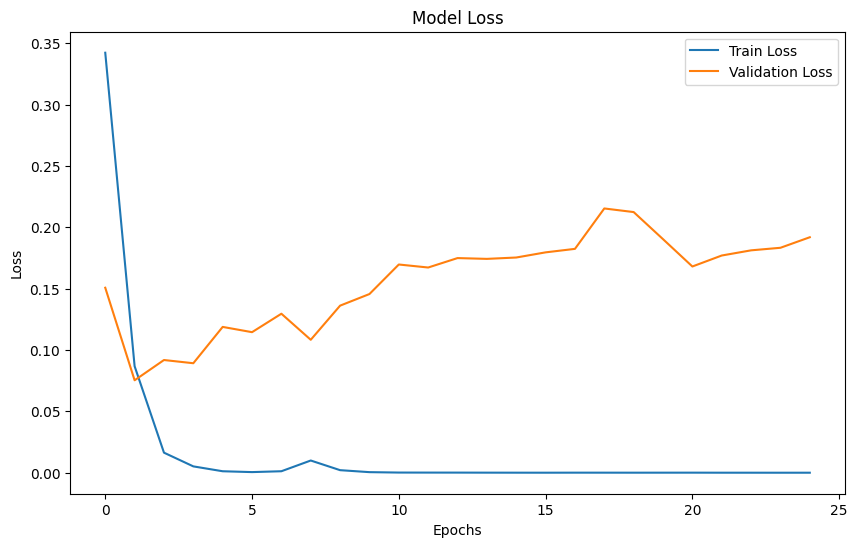

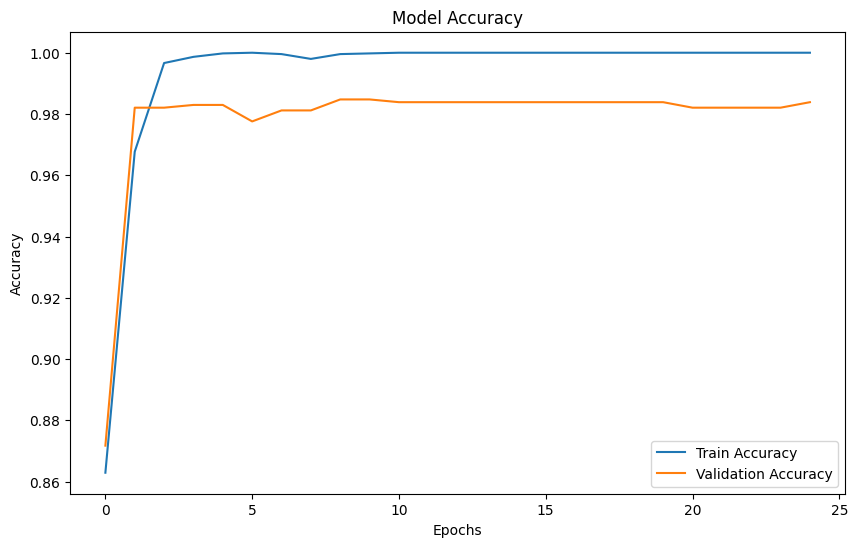

In [42]:
import matplotlib.pyplot as plt


history = model.fit(train_sequences, y_train, validation_data=(test_sequences, y_test), epochs=25, batch_size=32)


loss, accuracy = model.evaluate(test_sequences, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [36]:
model.evaluate(test_sequences, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.4250 - accuracy: 0.8710


[0.4249618947505951, 0.8709677457809448]

In [41]:
model.evaluate(test_sequences, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 0.3139 - accuracy: 0.9355


[0.3138729929924011, 0.9354838728904724]

# Konversi ke TFLite

In [37]:
model.save("C:/Users/ihsan/MyModel/model.h5")

In [ ]:
tf.saved_model.save(model, "shard.bin")

In [ ]:
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()